Lê o conteúdo da página https://g1.globo.com/.

Extrai os textos principais da página.

Gera um mapa de palavras (word cloud) com os termos mais frequentes, excluindo stopwords em português.

Código para rodar no Google Colab:

In [9]:
# Instalação de bibliotecas necessárias
!pip install requests beautifulsoup4 wordcloud unidecode nltk --quiet

# Imports
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords


In [2]:

# Baixando as stopwords em português
nltk.download('stopwords')
stopwords_pt = set(stopwords.words('portuguese'))

# Função para limpar o texto
def limpar_texto(texto):
    texto = unidecode(texto.lower())  # remover acentos e caixa alta
    palavras = texto.split()
    palavras = [p for p in palavras if p.isalpha() and p not in stopwords_pt and len(p) > 2]
    return " ".join(palavras)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


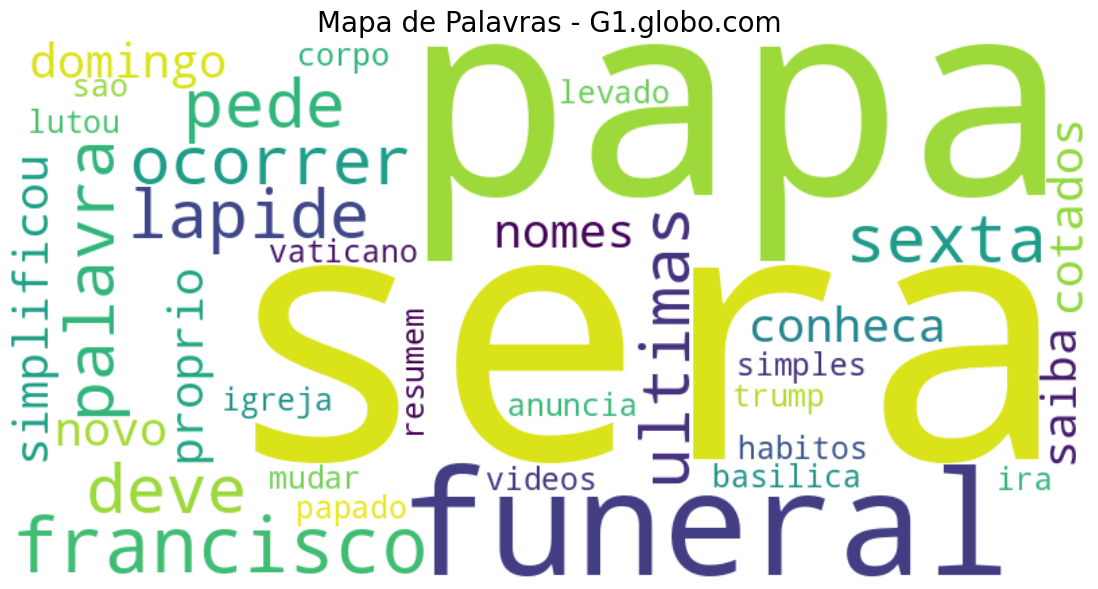

In [5]:

# Requisição à página do G1
url = "https://g1.globo.com/"
resposta = requests.get(url)
soup = BeautifulSoup(resposta.content, 'html.parser')

# Extração dos textos visíveis das manchetes, links e parágrafos
textos = []
total = 0
max=20
for tag in soup.find_all(['h1', 'h2', 'h3', 'p', 'a']):
    if total <= max:
      if tag.text:
          textos.append(tag.get_text(strip=True))
      total += 1
    else:
      break

# Concatenando e limpando os textos
texto_concatenado = ' '.join(textos)
texto_limpo = limpar_texto(texto_concatenado)

# Gerar o mapa de palavras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(texto_limpo)

# Exibir o mapa de palavras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Mapa de Palavras - G1.globo.com", fontsize=20)
plt.show()

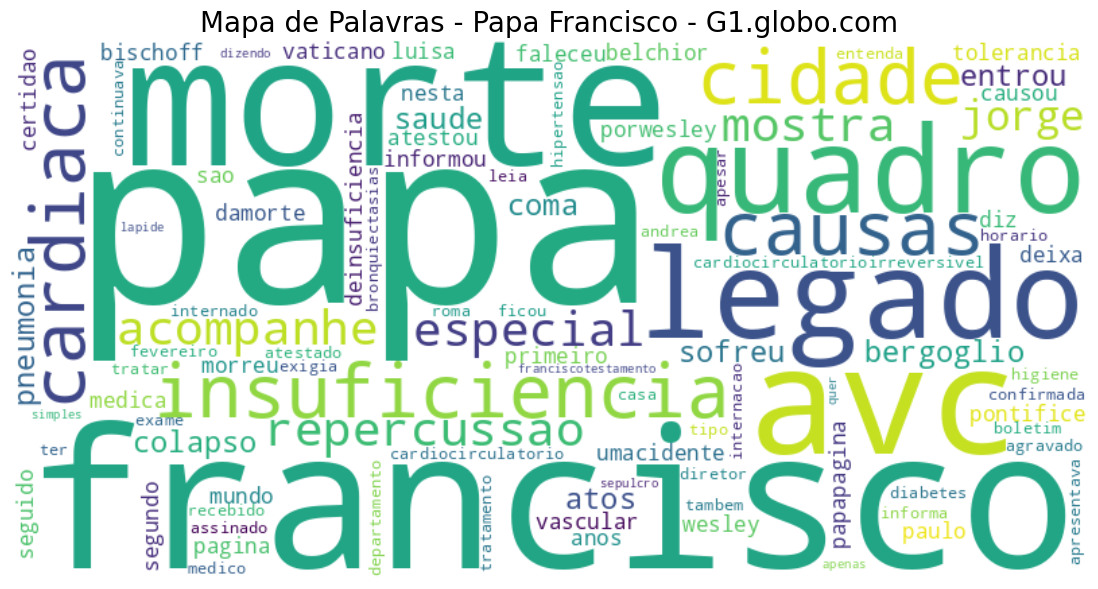

In [8]:
# Requisição à página do G1
url = "https://g1.globo.com/mundo/noticia/2025/04/21/causa-da-morte-do-papa-diz-vaticano.ghtml"
resposta = requests.get(url)
soup = BeautifulSoup(resposta.content, 'html.parser')

# Extração dos textos visíveis das manchetes, links e parágrafos
textos = []
total = 0
max=20
for tag in soup.find_all(['h1', 'h2', 'h3', 'p', 'a']):
    if total <= max:
      if tag.text:
          textos.append(tag.get_text(strip=True))
      total += 1
    else:
      break

# Concatenando e limpando os textos
texto_concatenado = ' '.join(textos)
texto_limpo = limpar_texto(texto_concatenado)

# Gerar o mapa de palavras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(texto_limpo)

# Exibir o mapa de palavras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Mapa de Palavras - Papa Francisco - G1.globo.com", fontsize=20)
plt.show()